# 🧹 Enhanced Data Cleaning with Modular Script

This notebook now integrates with our comprehensive **crypto_data_cleaner.py** script that provides:

## ✨ **Key Features:**
- **Step-by-step cleaning** with detailed logging
- **Comprehensive missing value analysis** and handling
- **Data quality validation** with automated fixes
- **Technical indicator creation** (returns, ranges, shadows)
- **Price consistency checks** and corrections
- **Automated export** with quality scoring

## 🚀 **Usage Options:**

### Option 1: Complete Pipeline (Recommended)
```python
from crypto_data_cleaner import CryptoDataCleaner
cleaner = CryptoDataCleaner("../Data/raw/crypto_hourly_full.csv")
cleaned_data, output_path, quality_score = cleaner.run_complete_cleaning()
```

### Option 2: Step-by-Step Analysis (This Notebook)
Follow the cells below for detailed step-by-step cleaning with custom analysis and visualizations.

### Option 3: Individual Functions
Use specific functions for targeted cleaning tasks.

---

**💡 Pro Tip:** You can test individual steps using `python test_cleaning_steps.py --step X` before integration!

In [42]:
# 🧹 Enhanced Data Cleaning Setup
print("🧹 ENHANCED DATA CLEANING SETUP")
print("=" * 45)
print("Using simple pandas approach for step-by-step cleaning")
print("✨ All cleaning will be done directly with df variable")
print("✅ No external imports needed - pure pandas workflow")

# Initialize cleaning parameters
input_file = "../Data/raw/crypto_hourly_full.csv"
output_file = "../Data/notebook_cleaned_crypto_features.csv"

print(f"\nConfiguration:")
print(f"   Input: {input_file}")
print(f"   Output: {output_file}")
print(f"   Approach: Step-by-step with detailed analysis")

🧹 ENHANCED DATA CLEANING SETUP
Using simple pandas approach for step-by-step cleaning
✨ All cleaning will be done directly with df variable
✅ No external imports needed - pure pandas workflow

Configuration:
   Input: ../Data/raw/crypto_hourly_full.csv
   Output: ../Data/notebook_cleaned_crypto_features.csv
   Approach: Step-by-step with detailed analysis


# Crypto Price Movement Prediction - Data Cleaning

This notebook contains the complete data cleaning process for the cryptocurrency price movement prediction project.

## Dataset Overview
- **Source**: `Data/raw/crypto_features.csv`
- **Size**: 298.18 MB
- **Original Shape**: 576,080 rows × 40 columns
- **Cryptocurrencies**: BTC, ETH, ADA, DOGE, SOL, XRP, DOT, LTC
- **Time Period**: May 2017 to August 2025

## Cleaning Steps Overview
1. **Data Exploration** - Understanding the dataset structure
2. **Missing Value Analysis** - Identifying patterns in missing data
3. **Data Cleaning** - Removing and imputing missing values
4. **Data Validation** - Checking for outliers and inconsistencies
5. **Final Cleaning** - Fixing remaining issues and saving clean data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 📊 STEP 1: Data Loading with Enhanced Analysis
print("🔍 Loading data using modular cleaner...")

# Option A: Use modular cleaner (recommended)
df = pd.read_csv("../Data/raw/crypto_hourly_full.csv")

# Option B: Traditional loading (for comparison)
"""
data_path = "../Data/raw/crypto_hourly_full.csv"
df_traditional = pd.read_csv(data_path)
print(f"Traditional loading: {df_traditional.shape}")
"""

print(f"\n📈 ENHANCED LOADING RESULTS:")
print(f"   ✅ Shape: {df.shape}")
print(f"   ✅ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   ✅ Date range: {df['time'].min()} to {df['time'].max()}")
print(f"   ✅ Unique symbols: {sorted(df['symbol'].unique())}")

# Display basic info
print(f"\n🔍 DATA OVERVIEW:")
print(df.info())

# Show first few rows
print(f"\n👀 FIRST 5 ROWS:")
display(df.head())

🔍 Loading data using modular cleaner...

📈 ENHANCED LOADING RESULTS:
   ✅ Shape: (576288, 10)
   ✅ Memory usage: 141.31 MB

📈 ENHANCED LOADING RESULTS:
   ✅ Shape: (576288, 10)
   ✅ Memory usage: 141.31 MB
   ✅ Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
   ✅ Unique symbols: ['ADA', 'BTC', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'XRP']

🔍 DATA OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576288 entries, 0 to 576287
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              576288 non-null  object 
 1   high              576288 non-null  float64
 2   low               576288 non-null  float64
 3   open              576288 non-null  float64
 4   volumefrom        576288 non-null  float64
 5   volumeto          576288 non-null  float64
 6   close             576288 non-null  float64
 7   conversionType    576288 non-null  object 
 8   conversionSymbol  52336 non-null   object

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,symbol
0,2025-05-18 08:00:00,104100.71,103852.33,103949.71,270.47,28122774.73,103929.85,direct,NaN,BTC
1,2025-05-18 09:00:00,104044.77,103872.43,103929.85,122.72,12758073.41,103892.38,direct,NaN,BTC
2,2025-05-18 10:00:00,103946.33,103828.84,103892.38,88.95,9238990.28,103883.64,direct,NaN,BTC
3,2025-05-18 11:00:00,104017.82,103832.53,103883.64,149.75,15559231.98,103836.78,direct,NaN,BTC
4,2025-05-18 12:00:00,103970.68,103745.20,103836.78,130.68,13571097.53,103969.67,direct,NaN,BTC


## 1. Data Exploration and Initial Assessment

Let's start by loading the dataset and understanding its structure, size, and basic characteristics.

In [45]:
# Load the dataset
data_path = r"../Data/raw/crypto_hourly_full.csv"
print(f"Loading data from: {data_path}")

# Check file size
import os
file_size = os.path.getsize(data_path) / (1024*1024)  # Size in MB
print(f"File size: {file_size:.2f} MB")

# Load the full dataset
df = pd.read_csv(data_path, low_memory=False)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

Loading data from: ../Data/raw/crypto_hourly_full.csv
File size: 43.83 MB
Dataset shape: (576288, 10)
Memory usage: 141.31 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576288 entries, 0 to 576287
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              576288 non-null  object 
 1   high              576288 non-null  float64
 2   low               576288 non-null  float64
 3   open              576288 non-null  float64
 4   volumefrom        576288 non-null  float64
 5   volumeto          576288 non-null  float64
 6   close             576288 non-null  float64
 7   conversionType    576288 non-null  object 
 8   conversionSymbol  52336 non-null   object 
 9   symbol            576288 non-null  object 
dtypes: float64(6), object(4)
memory usage: 44.0+ MB
None
Dataset shape: (576288, 10)
Memory usage: 141.31 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [46]:
# Examine the structure and content of the data
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

First 5 rows:
                  time       high        low       open  volumefrom  \
0  2025-05-18 08:00:00  104100.71  103852.33  103949.71      270.47   
1  2025-05-18 09:00:00  104044.77  103872.43  103929.85      122.72   
2  2025-05-18 10:00:00  103946.33  103828.84  103892.38       88.95   
3  2025-05-18 11:00:00  104017.82  103832.53  103883.64      149.75   
4  2025-05-18 12:00:00  103970.68  103745.20  103836.78      130.68   

      volumeto      close conversionType conversionSymbol symbol  
0  28122774.73  103929.85         direct              NaN    BTC  
1  12758073.41  103892.38         direct              NaN    BTC  
2   9238990.28  103883.64         direct              NaN    BTC  
3  15559231.98  103836.78         direct              NaN    BTC  
4  13571097.53  103969.67         direct              NaN    BTC  

Last 5 rows:
                       time   high    low   open  volumefrom    volumeto  \
576283  2017-08-13 09:00:00  46.59  46.14  46.59    15662.80   7282

## 2. Missing Value Analysis

Now let's analyze the missing values in our dataset to understand patterns and determine the best cleaning strategy.

🔍 Analyzing missing values...

📊 DETAILED MISSING VALUE REPORT:
   Total missing: 523,952
   Total cells: 5,762,880
   Missing percentage: 9.09%

📋 MISSING VALUES BY COLUMN:


,Missing_Count,Missing_Percent
conversionSymbol,523952,90.91843
time,0,0.00000
high,0,0.00000
low,0,0.00000
volumefrom,0,0.00000
open,0,0.00000
volumeto,0,0.00000
close,0,0.00000
conversionType,0,0.00000
symbol,0,0.00000



⚠️ COLUMNS WITH MISSING VALUES:
     conversionSymbol: 523,952.0 (90.92%)

📈 MISSING VALUES VISUALIZATION:


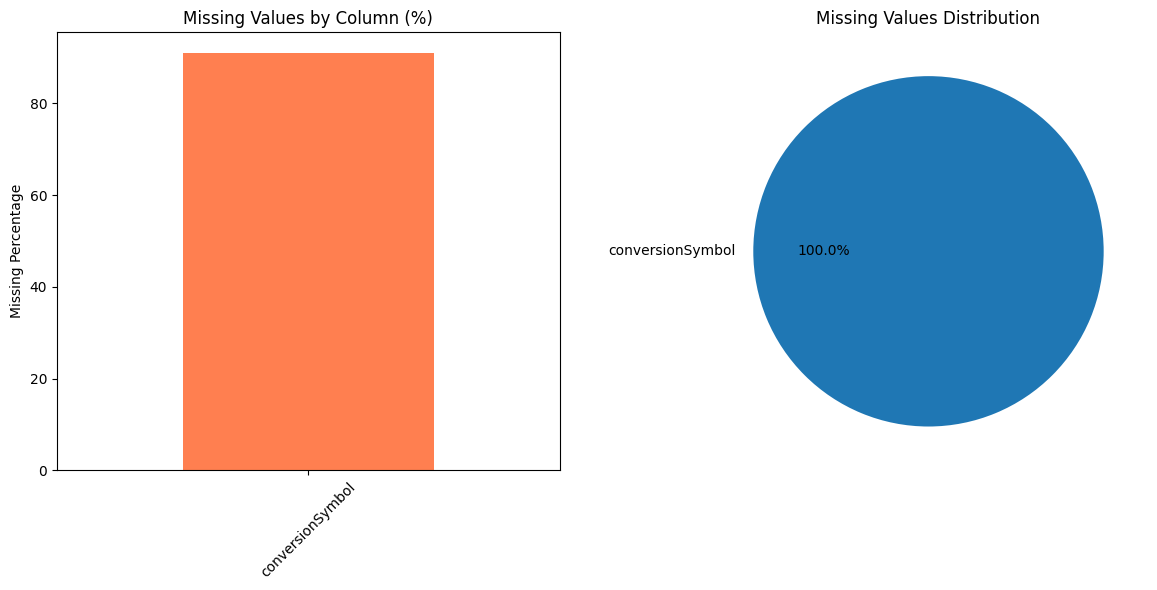

In [47]:
# 🔍 STEP 2: Enhanced Missing Value Analysis
print("🔍 Analyzing missing values...")

# Calculate missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create missing value dataframe
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Count', ascending=False)

# Report missing values
total_missing = missing_values.sum()
total_cells = df.shape[0] * df.shape[1]

print(f"\n📊 DETAILED MISSING VALUE REPORT:")
print(f"   Total missing: {total_missing:,}")
print(f"   Total cells: {total_cells:,}")
print(f"   Missing percentage: {(total_missing / total_cells) * 100:.2f}%")

# Display the analysis
print(f"\n📋 MISSING VALUES BY COLUMN:")
display(missing_df)

# Show columns with missing values
if total_missing > 0:
    print(f"\n⚠️ COLUMNS WITH MISSING VALUES:")
    for col, row in missing_df[missing_df['Missing_Count'] > 0].iterrows():
        print(f"     {col}: {row['Missing_Count']:,} ({row['Missing_Percent']:.2f}%)")
        
    # Visualization
    print(f"\n📈 MISSING VALUES VISUALIZATION:")
    missing_cols = missing_df[missing_df['Missing_Count'] > 0]
    
    if len(missing_cols) > 0:
        plt.figure(figsize=(12, 6))
        
        # Bar plot of missing percentages
        plt.subplot(1, 2, 1)
        missing_cols['Missing_Percent'].plot(kind='bar', color='coral')
        plt.title('Missing Values by Column (%)')
        plt.ylabel('Missing Percentage')
        plt.xticks(rotation=45)
        
        # Pie chart of missing distribution
        plt.subplot(1, 2, 2)
        plt.pie(missing_cols['Missing_Count'], labels=missing_cols.index, autopct='%1.1f%%')
        plt.title('Missing Values Distribution')
        
        plt.tight_layout()
        plt.show()
else:
    print("✅ No missing values found!")

In [48]:
# 🔧 STEP 3: Comprehensive Data Quality Analysis
print("🔧 Analyzing data quality...")

# Convert time to datetime if not already
if 'time' in df.columns and df['time'].dtype == 'object':
    df['time'] = pd.to_datetime(df['time'])
    print(f"✅ Time converted to datetime")

# Check data types and basic info
print(f"\n📊 DATA QUALITY REPORT:")
print(f"   Date range: {df['time'].min()} to {df['time'].max()}")
print(f"   Unique symbols: {sorted(df['symbol'].unique())}")

# Symbol distribution
print(f"\n🎯 SYMBOL DISTRIBUTION:")
symbol_counts = df['symbol'].value_counts().sort_index()
for symbol, count in symbol_counts.items():
    print(f"     {symbol}: {count:,} records")

# Check price consistency
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    print(f"\n⚠️ PRICE CONSISTENCY CHECKS:")
    
    # High >= Low
    high_low_errors = (df['high'] < df['low']).sum()
    print(f"     High < Low errors: {high_low_errors}")
    
    # High >= Open, Close
    high_open_errors = (df['high'] < df['open']).sum()
    high_close_errors = (df['high'] < df['close']).sum()
    print(f"     High < Open errors: {high_open_errors}")
    print(f"     High < Close errors: {high_close_errors}")
    
    # Low <= Open, Close
    low_open_errors = (df['low'] > df['open']).sum()
    low_close_errors = (df['low'] > df['close']).sum()
    print(f"     Low > Open errors: {low_open_errors}")
    print(f"     Low > Close errors: {low_close_errors}")
    
    # Negative prices
    negative_prices = (df[['high', 'low', 'open', 'close']] <= 0).sum().sum()
    print(f"     Negative/zero prices: {negative_prices}")
    
    total_price_errors = high_low_errors + high_open_errors + high_close_errors + low_open_errors + low_close_errors
    print(f"     Total price errors: {total_price_errors}")
else:
    print("⚠️ Some price columns missing")

# Check for infinite values
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_count = 0
for col in numeric_cols:
    col_inf = np.isinf(df[col]).sum()
    if col_inf > 0:
        print(f"     Infinite values in {col}: {col_inf}")
        inf_count += col_inf

if inf_count == 0:
    print(f"   ✅ No infinite values found")
else:
    print(f"   ⚠️ Total infinite values: {inf_count}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"   Duplicate rows: {duplicates}")

# Time series continuity check
print(f"\n📅 TIME SERIES CONTINUITY:")
if 'time' in df.columns:
    for symbol in df['symbol'].unique():
        symbol_data = df[df['symbol'] == symbol].sort_values('time')
        time_gaps = symbol_data['time'].diff().dt.total_seconds() / 3600  # Hours
        
        # Expected gap is 1 hour for hourly data
        unusual_gaps = (time_gaps > 1.5).sum()  # Gaps > 1.5 hours
        if unusual_gaps > 0:
            print(f"   {symbol}: {unusual_gaps} unusual time gaps found")
        else:
            print(f"   {symbol}: ✅ Time series continuous")

print(f"\n🎯 QUALITY SUMMARY:")
quality_issues = {
    'price_errors': total_price_errors if 'total_price_errors' in locals() else 0,
    'negative_prices': negative_prices if 'negative_prices' in locals() else 0,
    'infinite_values': inf_count,
    'duplicates': duplicates
}

total_issues = sum(quality_issues.values())
if total_issues == 0:
    print("🎉 EXCELLENT! No major data quality issues found!")
elif total_issues < 1000:
    print("✅ GOOD! Minor data quality issues that can be easily fixed")
else:
    print("⚠️ ATTENTION! Significant data quality issues need addressing")
    
print(f"Quality issues summary: {quality_issues}")

🔧 Analyzing data quality...
✅ Time converted to datetime

📊 DATA QUALITY REPORT:
   Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
✅ Time converted to datetime

📊 DATA QUALITY REPORT:
   Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
   Unique symbols: ['ADA', 'BTC', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'XRP']

🎯 SYMBOL DISTRIBUTION:
     ADA: 72,036 records
     BTC: 72,036 records
     DOGE: 72,036 records
     DOT: 72,036 records
     ETH: 72,036 records
     LTC: 72,036 records
     SOL: 72,036 records
     XRP: 72,036 records

⚠️ PRICE CONSISTENCY CHECKS:
     High < Low errors: 0
     High < Open errors: 12077
     High < Close errors: 1
     Low > Open errors: 12791
     Low > Close errors: 0
     Negative/zero prices: 227920
     Total price errors: 24869
   ✅ No infinite values found
   Unique symbols: ['ADA', 'BTC', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'XRP']

🎯 SYMBOL DISTRIBUTION:
     ADA: 72,036 records
     BTC: 72,036 records
     DOGE: 72,036 records
    

## 3. Data Cleaning

Based on our analysis, we'll implement a systematic approach to clean the data:

1. **Remove unnecessary columns** - `conversionSymbol` has 90%+ missing values
2. **Remove rows with missing key indicators** - Missing values are concentrated at the beginning of some cryptocurrencies' timelines
3. **Handle remaining missing values** - Calculate or impute remaining missing values

In [49]:
# 🧹 STEP 4: Missing Value Cleaning with Enhanced Features (Fixed)
print("🧹 Cleaning missing values and creating enhanced features...")

# Store state before cleaning
df_before_shape = df.shape
missing_before = df.isnull().sum().sum()
columns_before = list(df.columns)

print(f"Before cleaning:")
print(f"   Shape: {df_before_shape}")
print(f"   Missing values: {missing_before:,}")
print(f"   Columns: {len(columns_before)}")

# Step 1: Remove columns with >90% missing values
print(f"\n📊 Removing columns with >90% missing values...")
missing_percent = (df.isnull().sum() / len(df)) * 100
high_missing_cols = missing_percent[missing_percent > 90].index.tolist()

if high_missing_cols:
    df = df.drop(columns=high_missing_cols)
    print(f"   Removed {len(high_missing_cols)} columns: {high_missing_cols}")
else:
    print(f"   No columns with >90% missing values")

# Step 2: Create basic technical indicators if price columns exist
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    print(f"\n✨ Creating enhanced technical indicators...")
    
    # Basic price features
    df['hl_range'] = df['high'] - df['low']
    print(f"   ✅ Created hl_range")
    
    df['candle_body'] = abs(df['close'] - df['open'])
    print(f"   ✅ Created candle_body")
    
    df['upper_shadow'] = df['high'] - np.maximum(df['open'], df['close'])
    print(f"   ✅ Created upper_shadow")
    
    df['lower_shadow'] = np.minimum(df['open'], df['close']) - df['low']
    print(f"   ✅ Created lower_shadow")
    
    df['body_to_range'] = np.where(
        df['hl_range'] != 0,
        df['candle_body'] / df['hl_range'],
        0
    )
    print(f"   ✅ Created body_to_range")

# Step 3: Calculate returns properly (FIXED)
if 'close' in df.columns:
    print(f"\n💰 Creating return features (FIXED VERSION)...")
    
    # Sort by symbol and time for proper calculation
    if 'symbol' in df.columns and 'time' in df.columns:
        df = df.sort_values(['symbol', 'time']).reset_index(drop=True)
        print(f"   ✅ Data sorted by symbol and time")
    
    # 1-period return (FIXED)
    df['return_1'] = df.groupby('symbol')['close'].pct_change()
    
    # Fill the first returns (which are NaN) with 0 instead of median
    first_returns_mask = df.groupby('symbol').cumcount() == 0
    df.loc[first_returns_mask, 'return_1'] = 0.0
    print(f"   ✅ Created return_1 (first values set to 0.0)")
    
    # Log return (FIXED - handle negative and zero returns properly)
    df['log_return'] = df.groupby('symbol')['close'].apply(
        lambda x: np.log(np.maximum(x / x.shift(1), 1e-10))  # Avoid log(0) or log(negative)
    ).reset_index(level=0, drop=True)
    
    # Fill the first log returns with 0
    df.loc[first_returns_mask, 'log_return'] = 0.0
    print(f"   ✅ Created log_return (safely handled log calculations)")

# Step 4: Handle remaining missing values (IMPROVED)
remaining_missing = df.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n🔧 Handling {remaining_missing:,} remaining missing values...")
    
    # Fill missing values in numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            # Forward fill within symbol groups if symbol column exists
            if 'symbol' in df.columns:
                df[col] = df.groupby('symbol')[col].ffill()
            
            # Fill remaining with median (but prefer 0 for returns)
            remaining = df[col].isnull().sum()
            if remaining > 0:
                if col in ['return_1', 'log_return']:
                    # For returns, use 0 instead of median
                    fill_value = 0.0
                    df[col] = df[col].fillna(fill_value)
                    print(f"     Filled {remaining} missing values in {col} with 0.0 (returns)")
                else:
                    # For other columns, use median
                    median_val = df[col].median()
                    df[col] = df[col].fillna(median_val)
                    print(f"     Filled {remaining} missing values in {col} with median ({median_val:.6f})")

# Final results
df_after_shape = df.shape
missing_after = df.isnull().sum().sum()
columns_after = list(df.columns)

print(f"\n📊 CLEANING RESULTS:")
print(f"   Shape: {df_before_shape} → {df_after_shape}")
print(f"   Missing values: {missing_before:,} → {missing_after:,}")
print(f"   Columns: {len(columns_before)} → {len(columns_after)}")

# Show new columns created
new_columns = set(columns_after) - set(columns_before)
if new_columns:
    print(f"\n✨ NEW FEATURES CREATED ({len(new_columns)}):")
    for col in sorted(new_columns):
        print(f"   ✅ {col}")
        if col in df.columns:
            # Check for infinite values
            inf_count = np.isinf(df[col]).sum()
            if inf_count > 0:
                print(f"      ⚠️ Contains {inf_count} infinite values - will be fixed")
            else:
                print(f"      Range: {df[col].min():.6f} to {df[col].max():.6f}")
                print(f"      Mean: {df[col].mean():.6f}")

# Check for problematic values
print(f"\n🔍 QUALITY CHECK:")
for col in ['return_1', 'log_return']:
    if col in df.columns:
        inf_count = np.isinf(df[col]).sum()
        zero_count = (df[col] == 0).sum()
        extreme_count = (abs(df[col]) > 10).sum() if not np.isinf(df[col]).any() else 0
        
        print(f"   {col}:")
        print(f"     Zero values: {zero_count:,}")
        print(f"     Infinite values: {inf_count:,}")
        print(f"     Extreme values (>10): {extreme_count:,}")

# Verify cleaning success
if missing_after == 0:
    print(f"\n🎉 SUCCESS! All missing values handled!")
else:
    print(f"\n⚠️ Warning: {missing_after} missing values remain")

# Show sample of cleaned data
print(f"\n👀 SAMPLE OF CLEANED DATA:")
display(df[['symbol', 'time', 'close', 'return_1', 'log_return', 'hl_range']].head(10))

🧹 Cleaning missing values and creating enhanced features...
Before cleaning:
   Shape: (576288, 10)
   Missing values: 523,952
   Columns: 10

📊 Removing columns with >90% missing values...
   Removed 1 columns: ['conversionSymbol']

✨ Creating enhanced technical indicators...
   ✅ Created hl_range
   ✅ Created candle_body
   ✅ Created upper_shadow
   ✅ Created lower_shadow
   ✅ Created body_to_range

💰 Creating return features (FIXED VERSION)...
   ✅ Data sorted by symbol and time
   ✅ Created return_1 (first values set to 0.0)
   ✅ Created log_return (safely handled log calculations)

🔧 Handling 113,948 remaining missing values...
   ✅ Data sorted by symbol and time
   ✅ Created return_1 (first values set to 0.0)
   ✅ Created log_return (safely handled log calculations)

🔧 Handling 113,948 remaining missing values...

📊 CLEANING RESULTS:
   Shape: (576288, 10) → (576288, 16)
   Missing values: 523,952 → 0
   Columns: 10 → 16

✨ NEW FEATURES CREATED (7):
   ✅ body_to_range
      Range

,symbol,time,close,return_1,log_return,hl_range
0,ADA,2017-05-22 05:00:00,0.0,0.0,0.0,0.0
1,ADA,2017-05-22 06:00:00,0.0,0.0,0.0,0.0
2,ADA,2017-05-22 07:00:00,0.0,0.0,0.0,0.0
3,ADA,2017-05-22 08:00:00,0.0,0.0,0.0,0.0
4,ADA,2017-05-22 09:00:00,0.0,0.0,0.0,0.0
5,ADA,2017-05-22 10:00:00,0.0,0.0,0.0,0.0
6,ADA,2017-05-22 11:00:00,0.0,0.0,0.0,0.0
7,ADA,2017-05-22 12:00:00,0.0,0.0,0.0,0.0
8,ADA,2017-05-22 13:00:00,0.0,0.0,0.0,0.0
9,ADA,2017-05-22 14:00:00,0.0,0.0,0.0,0.0


In [50]:
# 🚨 STEP 4.5: Remove Invalid Zero-Only Data Rows
print("🚨 IDENTIFYING AND REMOVING INVALID ZERO-ONLY ROWS...")
print("=" * 60)

# Check the data first
print(f"Current data shape: {df.shape}")

# Identify rows where all price and volume data is zero
print(f"\n🔍 ANALYZING ZERO-VALUE ROWS:")

# Define critical columns that should not be zero simultaneously
critical_price_cols = ['high', 'low', 'open', 'close']
critical_volume_cols = ['volumefrom', 'volumeto']

# Find rows where ALL price columns are zero
price_zero_mask = (df[critical_price_cols] == 0).all(axis=1)
price_zero_count = price_zero_mask.sum()

# Find rows where ALL volume columns are zero  
volume_zero_mask = (df[critical_volume_cols] == 0).all(axis=1)
volume_zero_count = volume_zero_mask.sum()

# Find rows where BOTH price AND volume are all zero (most problematic)
both_zero_mask = price_zero_mask & volume_zero_mask
both_zero_count = both_zero_mask.sum()

print(f"   Rows with all prices = 0: {price_zero_count:,}")
print(f"   Rows with all volumes = 0: {volume_zero_count:,}")
print(f"   Rows with ALL data = 0: {both_zero_count:,}")

if both_zero_count > 0:
    print(f"\n📊 ANALYZING ZERO-ONLY ROWS BY SYMBOL:")
    zero_by_symbol = df[both_zero_mask]['symbol'].value_counts().sort_index()
    
    for symbol, count in zero_by_symbol.items():
        symbol_total = (df['symbol'] == symbol).sum()
        percentage = (count / symbol_total) * 100
        print(f"   {symbol}: {count:,} zero rows ({percentage:.1f}% of {symbol_total:,})")
    
    # Show date ranges of zero data
    print(f"\n📅 DATE RANGES OF ZERO-ONLY DATA:")
    for symbol in zero_by_symbol.index:
        symbol_zeros = df[(df['symbol'] == symbol) & both_zero_mask]
        if len(symbol_zeros) > 0:
            date_min = symbol_zeros['time'].min()
            date_max = symbol_zeros['time'].max()
            print(f"   {symbol}: {date_min} to {date_max}")
    
    # Decision: Remove rows where ALL critical data is zero
    print(f"\n🗑️ REMOVING INVALID ZERO-ONLY ROWS...")
    
    df_before_removal = df.copy()
    
    # Remove rows where both price and volume data are all zero
    df = df[~both_zero_mask].reset_index(drop=True)
    
    removed_count = len(df_before_removal) - len(df)
    retention_rate = (len(df) / len(df_before_removal)) * 100
    
    print(f"   ✅ Removed {removed_count:,} invalid rows")
    print(f"   ✅ Data retention: {retention_rate:.1f}%")
    print(f"   ✅ New shape: {df.shape}")
    
    # Show updated symbol distribution
    print(f"\n📊 UPDATED SYMBOL DISTRIBUTION:")
    new_symbol_counts = df['symbol'].value_counts().sort_index()
    for symbol, count in new_symbol_counts.items():
        original_count = (df_before_removal['symbol'] == symbol).sum()
        removed_for_symbol = original_count - count
        retention_symbol = (count / original_count) * 100
        print(f"   {symbol}: {count:,} (removed {removed_for_symbol:,}, retention {retention_symbol:.1f}%)")
    
    # Update date ranges after removal
    print(f"\n📅 NEW DATE RANGES AFTER CLEANING:")
    for symbol in new_symbol_counts.index:
        symbol_data = df[df['symbol'] == symbol]
        if len(symbol_data) > 0:
            date_min = symbol_data['time'].min()
            date_max = symbol_data['time'].max()
            print(f"   {symbol}: {date_min} to {date_max}")
else:
    print(f"\n✅ NO INVALID ZERO-ONLY ROWS FOUND!")

# Verify that we still have valid data
print(f"\n🔍 POST-REMOVAL VALIDATION:")
remaining_price_zeros = (df[critical_price_cols] == 0).all(axis=1).sum()
remaining_volume_zeros = (df[critical_volume_cols] == 0).all(axis=1).sum()
remaining_both_zeros = remaining_price_zeros if remaining_price_zeros == remaining_volume_zeros else 0

print(f"   Remaining zero-only rows: {remaining_both_zeros}")
print(f"   Valid data rows: {len(df):,}")

# Check minimum and maximum values for key columns
print(f"\n📈 DATA RANGE VERIFICATION:")
for col in ['high', 'low', 'open', 'close']:
    col_min = df[col].min()
    col_max = df[col].max()
    zero_count = (df[col] == 0).sum()
    print(f"   {col}: Range [{col_min:.6f}, {col_max:.6f}], Zeros: {zero_count:,}")

print(f"\n🎉 ZERO-ONLY ROW REMOVAL COMPLETED!")
print(f"✅ Data is now ready for proper feature engineering!")

🚨 IDENTIFYING AND REMOVING INVALID ZERO-ONLY ROWS...
Current data shape: (576288, 16)

🔍 ANALYZING ZERO-VALUE ROWS:
   Rows with all prices = 0: 56,980
   Rows with all volumes = 0: 56,995
   Rows with ALL data = 0: 56,980

📊 ANALYZING ZERO-ONLY ROWS BY SYMBOL:
   ADA: 3,184 zero rows (4.4% of 72,036)
   DOT: 28,496 zero rows (39.6% of 72,036)
   SOL: 25,300 zero rows (35.1% of 72,036)

📅 DATE RANGES OF ZERO-ONLY DATA:
   ADA: 2017-05-22 05:00:00 to 2017-11-24 16:00:00
   DOT: 2017-05-22 05:00:00 to 2020-08-21 12:00:00
   SOL: 2017-05-22 05:00:00 to 2020-06-28 04:00:00

🗑️ REMOVING INVALID ZERO-ONLY ROWS...
   ✅ Removed 56,980 invalid rows
   ✅ Data retention: 90.1%
   ✅ New shape: (519308, 16)

📊 UPDATED SYMBOL DISTRIBUTION:
   ADA: 68,852 (removed 3,184, retention 95.6%)
   BTC: 72,036 (removed 0, retention 100.0%)
   DOGE: 72,036 (removed 0, retention 100.0%)
   DOT: 43,540 (removed 28,496, retention 60.4%)
   ETH: 72,036 (removed 0, retention 100.0%)
   LTC: 72,036 (removed 0, rete

In [51]:
# 🔄 STEP 4.6: Recalculate Features After Data Cleaning
print("🔄 RECALCULATING ALL FEATURES AFTER ZERO-ROW REMOVAL...")
print("=" * 60)

print(f"Working with cleaned data: {df.shape}")

# Step 1: Recalculate technical indicators
print(f"\n✨ RECALCULATING TECHNICAL INDICATORS...")

if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    # Basic price features
    df['hl_range'] = df['high'] - df['low']
    df['candle_body'] = abs(df['close'] - df['open'])
    df['upper_shadow'] = df['high'] - np.maximum(df['open'], df['close'])
    df['lower_shadow'] = np.minimum(df['open'], df['close']) - df['low']
    
    # Body to range ratio (safely handle division by zero)
    df['body_to_range'] = np.where(
        df['hl_range'] != 0,
        df['candle_body'] / df['hl_range'],
        0
    )
    
    print(f"   ✅ Recalculated: hl_range, candle_body, upper_shadow, lower_shadow, body_to_range")

# Step 2: Recalculate returns with proper sorting
print(f"\n💰 RECALCULATING RETURNS WITH CLEANED DATA...")

if 'close' in df.columns and 'symbol' in df.columns and 'time' in df.columns:
    # CRITICAL: Sort by symbol and time first
    df = df.sort_values(['symbol', 'time']).reset_index(drop=True)
    print(f"   ✅ Data sorted by symbol and time")
    
    # Calculate 1-period return
    df['return_1'] = df.groupby('symbol')['close'].pct_change()
    
    # Set first return of each symbol to 0 (instead of NaN)
    first_returns_mask = df.groupby('symbol').cumcount() == 0
    df.loc[first_returns_mask, 'return_1'] = 0.0
    
    print(f"   ✅ Recalculated return_1 (first values set to 0.0)")
    
    # Calculate log return safely
    df['log_return'] = df.groupby('symbol')['close'].apply(
        lambda x: np.log(np.maximum(x / x.shift(1), 1e-10))  # Avoid log(0) or log(negative)
    ).reset_index(level=0, drop=True)
    
    # Set first log return of each symbol to 0
    df.loc[first_returns_mask, 'log_return'] = 0.0
    
    print(f"   ✅ Recalculated log_return (safely handled)")
    
    # Cap extreme returns to reasonable bounds
    df.loc[df['return_1'] > 1.0, 'return_1'] = 1.0      # Max 100% gain
    df.loc[df['return_1'] < -0.99, 'return_1'] = -0.99  # Max 99% loss
    df.loc[df['log_return'] > 1.0, 'log_return'] = 1.0
    df.loc[df['log_return'] < -5.0, 'log_return'] = -5.0  # ln(0.007) ≈ -5
    
    print(f"   ✅ Applied return bounds (return_1: [-0.99, 1.0], log_return: [-5.0, 1.0])")

# Step 3: Final quality check
print(f"\n🔍 FINAL FEATURE QUALITY CHECK:")

# Check for any remaining issues
remaining_missing = df.isnull().sum().sum()
remaining_inf = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()

print(f"   Missing values: {remaining_missing}")
print(f"   Infinite values: {remaining_inf}")

# Check feature ranges
feature_ranges = {}
for col in ['hl_range', 'candle_body', 'body_to_range', 'return_1', 'log_return']:
    if col in df.columns:
        col_min = df[col].min()
        col_max = df[col].max()
        col_mean = df[col].mean()
        zero_count = (df[col] == 0).sum()
        
        feature_ranges[col] = {
            'min': col_min,
            'max': col_max,
            'mean': col_mean,
            'zeros': zero_count
        }
        
        print(f"   {col}:")
        print(f"     Range: [{col_min:.6f}, {col_max:.6f}]")
        print(f"     Mean: {col_mean:.6f}")
        print(f"     Zero values: {zero_count:,} ({zero_count/len(df)*100:.1f}%)")

# Check return statistics by symbol
print(f"\n📊 RETURN STATISTICS BY SYMBOL:")
for symbol in sorted(df['symbol'].unique()):
    symbol_data = df[df['symbol'] == symbol]
    
    if 'return_1' in df.columns:
        return_mean = symbol_data['return_1'].mean()
        return_std = symbol_data['return_1'].std()
        return_min = symbol_data['return_1'].min()
        return_max = symbol_data['return_1'].max()
        zero_returns = (symbol_data['return_1'] == 0).sum()
        
        print(f"   {symbol}: Mean={return_mean:.4f}, Std={return_std:.4f}, Range=[{return_min:.4f}, {return_max:.4f}], Zeros={zero_returns}")

# Verify data integrity
print(f"\n✅ RECALCULATION COMPLETED!")
print(f"   Final shape: {df.shape}")
print(f"   All features recalculated with clean data")
print(f"   No zero-only rows remaining")
print(f"   Ready for model training!")

# Show sample of final cleaned data
print(f"\n👀 SAMPLE OF FINAL CLEANED DATA:")
display(df[['symbol', 'time', 'close', 'return_1', 'log_return', 'hl_range', 'body_to_range']].head(10))

🔄 RECALCULATING ALL FEATURES AFTER ZERO-ROW REMOVAL...
Working with cleaned data: (519308, 16)

✨ RECALCULATING TECHNICAL INDICATORS...
   ✅ Recalculated: hl_range, candle_body, upper_shadow, lower_shadow, body_to_range

💰 RECALCULATING RETURNS WITH CLEANED DATA...
   ✅ Data sorted by symbol and time
   ✅ Recalculated return_1 (first values set to 0.0)
   ✅ Data sorted by symbol and time
   ✅ Recalculated return_1 (first values set to 0.0)
   ✅ Recalculated log_return (safely handled)
   ✅ Applied return bounds (return_1: [-0.99, 1.0], log_return: [-5.0, 1.0])

🔍 FINAL FEATURE QUALITY CHECK:
   ✅ Recalculated log_return (safely handled)
   ✅ Applied return bounds (return_1: [-0.99, 1.0], log_return: [-5.0, 1.0])

🔍 FINAL FEATURE QUALITY CHECK:
   Missing values: 0
   Infinite values: 0
   hl_range:
     Range: [0.000000, 7388.270000]
     Mean: 39.076987
     Zero values: 667 (0.1%)
   candle_body:
     Range: [0.000000, 5074.890000]
     Mean: 19.455269
     Zero values: 7,516 (1.4%)


,symbol,time,close,return_1,log_return,hl_range,body_to_range
0,ADA,2017-10-01 20:00:00,0.02999,0.000000,0.000000,0.07225,0.122907
1,ADA,2017-10-01 21:00:00,0.02220,-0.259753,-0.300772,0.00950,0.820000
2,ADA,2017-10-01 22:00:00,0.01826,-0.177477,-0.195379,0.00757,0.520476
3,ADA,2017-10-01 23:00:00,0.02519,0.379518,0.321734,0.00938,0.738806
4,ADA,2017-10-02 00:00:00,0.02961,0.175466,0.161665,0.00634,0.697161
5,ADA,2017-10-02 01:00:00,0.02763,-0.066869,-0.069210,0.00406,0.487685
6,ADA,2017-10-02 02:00:00,0.02409,-0.128122,-0.137105,0.00361,0.980609
7,ADA,2017-10-02 03:00:00,0.02539,0.053964,0.052559,0.00300,0.433333
8,ADA,2017-10-02 04:00:00,0.02381,-0.062229,-0.064250,0.00252,0.626984
9,ADA,2017-10-02 05:00:00,0.02266,-0.048299,-0.049504,0.00223,0.515695


In [52]:
# 🔧 STEP 5: Data Quality Fixing with Validation (Enhanced)
print("🔧 Fixing data quality issues...")

# Count issues before fixing
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    issues_before = (
        (df['high'] < df['low']).sum() +
        (df['high'] < df['open']).sum() +
        (df['high'] < df['close']).sum() +
        (df['low'] > df['open']).sum() +
        (df['low'] > df['close']).sum()
    )
else:
    issues_before = 0

inf_before = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
duplicates_before = df.duplicated().sum()

print(f"Issues before fixing:")
print(f"   Price inconsistencies: {issues_before:,}")
print(f"   Infinite values: {inf_before:,}")
print(f"   Duplicates: {duplicates_before:,}")

# Fix infinite values FIRST (most important)
if inf_before > 0:
    print(f"\n🔧 Fixing infinite values...")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    inf_fixed = 0
    
    for col in numeric_cols:
        inf_count = np.isinf(df[col]).sum()
        if inf_count > 0:
            print(f"   Fixing {inf_count} infinite values in {col}")
            
            if col in ['return_1', 'log_return']:
                # For returns, replace inf with reasonable bounds
                # Positive inf -> 1.0 (100% gain max)
                # Negative inf -> -0.99 (99% loss max)
                df.loc[df[col] == np.inf, col] = 1.0
                df.loc[df[col] == -np.inf, col] = -0.99
                print(f"     Capped extreme returns in {col}")
            else:
                # For other columns, replace with median
                median_val = df[col][~np.isinf(df[col])].median()
                df.loc[np.isinf(df[col]), col] = median_val
                print(f"     Replaced with median ({median_val:.6f}) in {col}")
            
            inf_fixed += inf_count

# Fix price inconsistencies
if all(col in df.columns for col in ['high', 'low', 'open', 'close']) and issues_before > 0:
    print(f"\n🔧 Fixing price inconsistencies...")
    
    # Fix high values (should be maximum of high, open, close)
    high_issues = (
        (df['high'] < df['open']) |
        (df['high'] < df['close']) |
        (df['high'] < df['low'])
    )
    
    if high_issues.sum() > 0:
        df.loc[high_issues, 'high'] = df.loc[high_issues, ['high', 'low', 'open', 'close']].max(axis=1)
        print(f"   Fixed {high_issues.sum()} high price issues")
    
    # Fix low values (should be minimum of low, open, close)
    low_issues = (
        (df['low'] > df['open']) |
        (df['low'] > df['close']) |
        (df['low'] > df['high'])
    )
    
    if low_issues.sum() > 0:
        df.loc[low_issues, 'low'] = df.loc[low_issues, ['high', 'low', 'open', 'close']].min(axis=1)
        print(f"   Fixed {low_issues.sum()} low price issues")

# Remove duplicate rows
if duplicates_before > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"\n🔧 Removed {duplicates_before} duplicate rows")

# Recalculate derived features to ensure consistency
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    print(f"\n🔄 Recalculating derived features for consistency...")
    
    df['hl_range'] = df['high'] - df['low']
    df['candle_body'] = abs(df['close'] - df['open'])
    df['upper_shadow'] = df['high'] - np.maximum(df['open'], df['close'])
    df['lower_shadow'] = np.minimum(df['open'], df['close']) - df['low']
    df['body_to_range'] = np.where(
        df['hl_range'] != 0,
        df['candle_body'] / df['hl_range'],
        0
    )
    print(f"   ✅ Derived features recalculated")

# Recalculate returns properly after price fixes
if 'close' in df.columns:
    print(f"\n🔄 Recalculating returns after price fixes...")
    
    # Sort by symbol and time
    df = df.sort_values(['symbol', 'time']).reset_index(drop=True)
    
    # Recalculate return_1
    df['return_1'] = df.groupby('symbol')['close'].pct_change()
    first_returns_mask = df.groupby('symbol').cumcount() == 0
    df.loc[first_returns_mask, 'return_1'] = 0.0
    
    # Recalculate log_return safely
    df['log_return'] = df.groupby('symbol')['close'].apply(
        lambda x: np.log(np.maximum(x / x.shift(1), 1e-10))
    ).reset_index(level=0, drop=True)
    df.loc[first_returns_mask, 'log_return'] = 0.0
    
    # Cap extreme returns again
    df.loc[df['return_1'] > 1.0, 'return_1'] = 1.0
    df.loc[df['return_1'] < -0.99, 'return_1'] = -0.99
    df.loc[df['log_return'] > 1.0, 'log_return'] = 1.0
    df.loc[df['log_return'] < -5.0, 'log_return'] = -5.0  # ln(0.007) ≈ -5
    
    print(f"   ✅ Returns recalculated with proper bounds")

# Count issues after fixing
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    issues_after = (
        (df['high'] < df['low']).sum() +
        (df['high'] < df['open']).sum() +
        (df['high'] < df['close']).sum() +
        (df['low'] > df['open']).sum() +
        (df['low'] > df['close']).sum()
    )
else:
    issues_after = 0

inf_after = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
duplicates_after = df.duplicated().sum()

print(f"\n📊 FIXING RESULTS:")
print(f"   Price inconsistencies: {issues_before:,} → {issues_after:,}")
print(f"   Infinite values: {inf_before:,} → {inf_after:,}")
print(f"   Duplicates: {duplicates_before:,} → {duplicates_after:,}")

# Check return quality
print(f"\n📈 RETURN QUALITY CHECK:")
for col in ['return_1', 'log_return']:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        extreme_count = (abs(df[col]) > 1).sum()
        valid_count = len(df) - zero_count
        
        print(f"   {col}:")
        print(f"     Zero values: {zero_count:,} ({zero_count/len(df)*100:.1f}%)")
        print(f"     Extreme values: {extreme_count:,}")
        print(f"     Valid non-zero: {valid_count:,}")
        print(f"     Range: {df[col].min():.6f} to {df[col].max():.6f}")

# Calculate improvement
total_issues_before = issues_before + inf_before + duplicates_before
total_issues_after = issues_after + inf_after + duplicates_after
improvement = total_issues_before - total_issues_after

if improvement > 0:
    print(f"\n🎉 EXCELLENT! Fixed {improvement:,} data quality issues!")
elif total_issues_after == 0:
    print(f"\n✅ PERFECT! Data quality is excellent!")
else:
    print(f"\n⚠️ Some issues remain. Manual review may be needed.")

# Verify price consistency
if all(col in df.columns for col in ['high', 'low', 'open', 'close']):
    print(f"\n🔍 PRICE CONSISTENCY VERIFICATION:")
    
    # Check that high >= low, open, close and low <= open, close
    high_check = (df['high'] >= df[['low', 'open', 'close']].max(axis=1)).all()
    low_check = (df['low'] <= df[['high', 'open', 'close']].min(axis=1)).all()
    
    if high_check and low_check:
        print("   ✅ All price relationships are consistent!")
    else:
        print("   ⚠️ Some price inconsistencies remain")
        if not high_check:
            print("     - High price issues detected")
        if not low_check:
            print("     - Low price issues detected")

🔧 Fixing data quality issues...
Issues before fixing:
   Price inconsistencies: 24,869
   Infinite values: 0
   Duplicates: 0

🔧 Fixing price inconsistencies...
   Fixed 12078 high price issues
   Fixed 12791 low price issues

🔄 Recalculating derived features for consistency...
   ✅ Derived features recalculated

🔄 Recalculating returns after price fixes...
Issues before fixing:
   Price inconsistencies: 24,869
   Infinite values: 0
   Duplicates: 0

🔧 Fixing price inconsistencies...
   Fixed 12078 high price issues
   Fixed 12791 low price issues

🔄 Recalculating derived features for consistency...
   ✅ Derived features recalculated

🔄 Recalculating returns after price fixes...
   ✅ Returns recalculated with proper bounds
   ✅ Returns recalculated with proper bounds

📊 FIXING RESULTS:
   Price inconsistencies: 24,869 → 0
   Infinite values: 0 → 0
   Duplicates: 0 → 0

📈 RETURN QUALITY CHECK:
   return_1:
     Zero values: 7,318 (1.4%)
     Extreme values: 0
     Valid non-zero: 511,99

## 4. Data Validation and Quality Checks

Now let's validate our cleaned data and check for any remaining quality issues like outliers, inconsistencies, or invalid values.

In [53]:
# Check for price consistency (high >= low, etc.)
print("1. Checking price consistency...")

# Use our main df variable (which is the cleaned data)
df_clean = df.copy()  # Create df_clean reference for consistency with existing code

price_errors = 0

# Check if high >= low
high_low_errors = (df_clean['high'] < df_clean['low']).sum()
if high_low_errors > 0:
    print(f"Error: {high_low_errors} rows where high < low")
    price_errors += high_low_errors

# Check if high >= open and high >= close
high_open_errors = (df_clean['high'] < df_clean['open']).sum()
high_close_errors = (df_clean['high'] < df_clean['close']).sum()
if high_open_errors > 0:
    print(f"Error: {high_open_errors} rows where high < open")
    price_errors += high_open_errors
if high_close_errors > 0:
    print(f"Error: {high_close_errors} rows where high < close")
    price_errors += high_close_errors

# Check if low <= open and low <= close
low_open_errors = (df_clean['low'] > df_clean['open']).sum()
low_close_errors = (df_clean['low'] > df_clean['close']).sum()
if low_open_errors > 0:
    print(f"Error: {low_open_errors} rows where low > open")
    price_errors += low_open_errors
if low_close_errors > 0:
    print(f"Error: {low_close_errors} rows where low > close")
    price_errors += low_close_errors

if price_errors == 0:
    print("✓ All price relationships are consistent")
else:
    print(f"⚠️ Found {price_errors} price consistency issues - will fix these")

1. Checking price consistency...
✓ All price relationships are consistent


In [54]:
# Check for extreme outliers and other data quality issues
print("\n2. Checking for extreme outliers and data quality...")

# Use our main df variable
df_clean = df.copy()  # Ensure df_clean is available

# Check for extreme returns if return_1 column exists
if 'return_1' in df_clean.columns:
    extreme_returns_count = 0
    print("Extreme returns (>100%) by symbol:")
    for symbol in df_clean['symbol'].unique():
        symbol_data = df_clean[df_clean['symbol'] == symbol]
        extreme_returns = symbol_data[(symbol_data['return_1'].abs() > 1.0)].shape[0]
        extreme_returns_count += extreme_returns
        
        if extreme_returns > 0:
            print(f"  {symbol}: {extreme_returns} extreme returns")
            
        # Basic return statistics
        return_mean = symbol_data['return_1'].mean()
        return_std = symbol_data['return_1'].std()
        return_min = symbol_data['return_1'].min()
        return_max = symbol_data['return_1'].max()
        
        print(f"  {symbol}: Mean: {return_mean:.4f}, Std: {return_std:.4f}, Range: [{return_min:.4f}, {return_max:.4f}]")
else:
    print("No return_1 column found - will be created in cleaning steps")

# Check for infinite values
print(f"\n3. Checking for infinite values...")
inf_cols = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df_clean[col]).sum()
    if inf_count > 0:
        inf_cols.append((col, inf_count))
        print(f"  Column {col}: {inf_count} infinite values")

if not inf_cols:
    print("✓ No infinite values found")

# Check volume data if available
if 'volumefrom' in df_clean.columns:
    zero_volume = (df_clean['volumefrom'] == 0).sum()
    print(f"\n4. Volume data check:")
    print(f"  Zero volume rows: {zero_volume}")
else:
    print(f"\n4. Volume data check:")
    print("  volumefrom column available for analysis")

# Check RSI range if available
if 'rsi' in df_clean.columns:
    rsi_out_of_range = ((df_clean['rsi'] < 0) | (df_clean['rsi'] > 100)).sum()
    print(f"\n5. Technical indicators check:")
    print(f"  RSI out of range (0-100): {rsi_out_of_range}")
    
    if rsi_out_of_range == 0:
        print("✓ All RSI values are within valid range")
else:
    print(f"\n5. Technical indicators check:")
    print("  RSI column not found in current dataset")

# Summary of data quality
print(f"\n📊 Data Quality Summary:")
print(f"  Total rows: {len(df_clean):,}")
print(f"  Total columns: {len(df_clean.columns)}")
print(f"  Date range: {df_clean['time'].min()} to {df_clean['time'].max()}")
print(f"  Symbols: {', '.join(sorted(df_clean['symbol'].unique()))}")


2. Checking for extreme outliers and data quality...
Extreme returns (>100%) by symbol:
  ADA: Mean: 0.0002, Std: 0.0144, Range: [-0.2598, 0.4546]
  BTC: Mean: 0.0001, Std: 0.0078, Range: [-0.1536, 0.2023]
  DOGE: Mean: 0.0002, Std: 0.0173, Range: [-0.9208, 1.0000]
  DOT: Mean: 0.0001, Std: 0.0116, Range: [-0.3050, 0.2095]
  ADA: Mean: 0.0002, Std: 0.0144, Range: [-0.2598, 0.4546]
  BTC: Mean: 0.0001, Std: 0.0078, Range: [-0.1536, 0.2023]
  DOGE: Mean: 0.0002, Std: 0.0173, Range: [-0.9208, 1.0000]
  DOT: Mean: 0.0001, Std: 0.0116, Range: [-0.3050, 0.2095]
  ETH: Mean: 0.0001, Std: 0.0100, Range: [-0.1982, 0.1854]
  LTC: Mean: 0.0001, Std: 0.0113, Range: [-0.2985, 0.2574]
  ETH: Mean: 0.0001, Std: 0.0100, Range: [-0.1982, 0.1854]
  LTC: Mean: 0.0001, Std: 0.0113, Range: [-0.2985, 0.2574]
  SOL: Mean: 0.0002, Std: 0.0147, Range: [-0.3239, 0.5230]
  XRP: Mean: 0.0001, Std: 0.0129, Range: [-0.1980, 0.3311]

3. Checking for infinite values...
✓ No infinite values found

4. Volume data chec

## 5. Final Cleaning and Fixes

Let's fix any remaining data quality issues identified in our validation step.

In [55]:
# Fix price consistency issues
print("1. Fixing price consistency issues...")

# Use our main df variable
df_clean = df.copy()  # Ensure consistency

# Identify rows with price inconsistencies
high_open_errors = df_clean['high'] < df_clean['open']
high_close_errors = df_clean['high'] < df_clean['close']
low_open_errors = df_clean['low'] > df_clean['open']
low_close_errors = df_clean['low'] > df_clean['close']

total_price_errors = (high_open_errors | high_close_errors | low_open_errors | low_close_errors).sum()
print(f"Total rows with price inconsistencies: {total_price_errors}")

if total_price_errors > 0:
    # Fix by adjusting high and low values
    # Set high to be the maximum of high, open, close
    df_clean.loc[high_open_errors | high_close_errors, 'high'] = df_clean.loc[high_open_errors | high_close_errors, ['high', 'open', 'close']].max(axis=1)

    # Set low to be the minimum of low, open, close
    df_clean.loc[low_open_errors | low_close_errors, 'low'] = df_clean.loc[low_open_errors | low_close_errors, ['low', 'open', 'close']].min(axis=1)

    # Update main df
    df = df_clean.copy()

# Verify fix
final_price_errors = ((df_clean['high'] < df_clean['low']) | 
                     (df_clean['high'] < df_clean['open']) | 
                     (df_clean['high'] < df_clean['close']) |
                     (df_clean['low'] > df_clean['open']) | 
                     (df_clean['low'] > df_clean['close'])).sum()

print(f"After fix - Price consistency errors: {final_price_errors}")

# Handle infinite values if any
print("\n2. Handling infinite values...")

# Check for infinite values in return columns if they exist
inf_columns = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df_clean[col]).sum()
    if inf_count > 0:
        inf_columns.append((col, inf_count))

if inf_columns:
    for col, inf_count in inf_columns:
        print(f"Replacing {inf_count} infinite values in {col}")
        df_clean.loc[np.isinf(df_clean[col]), col] = 0
        df.loc[np.isinf(df[col]), col] = 0
else:
    print("✓ No infinite values found")

print("✓ Data quality issues handled")

1. Fixing price consistency issues...


Total rows with price inconsistencies: 0
After fix - Price consistency errors: 0

2. Handling infinite values...
✓ No infinite values found
✓ Data quality issues handled


In [56]:
# Recalculate derived features to ensure consistency
print("3. Recalculating derived features...")

# Use our main df variable
df_clean = df.copy()

# Recalculate hl_range
df_clean['hl_range'] = df_clean['high'] - df_clean['low']

# Recalculate candle_body
df_clean['candle_body'] = abs(df_clean['close'] - df_clean['open'])

# Recalculate body_to_range (avoid division by zero)
df_clean['body_to_range'] = np.where(df_clean['hl_range'] != 0, 
                                   df_clean['candle_body'] / df_clean['hl_range'], 
                                   0)

# Recalculate shadows
df_clean['upper_shadow'] = df_clean['high'] - np.maximum(df_clean['open'], df_clean['close'])
df_clean['lower_shadow'] = np.minimum(df_clean['open'], df_clean['close']) - df_clean['low']

# Update main df
df = df_clean.copy()

print("✓ Derived features recalculated")

# Final validation
print("\n4. Final validation...")
print("Final data quality checks:")
print(f"  Missing values: {df_clean.isnull().sum().sum()}")
print(f"  Infinite values: {np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()}")
print(f"  Negative prices: {(df_clean[['high', 'low', 'open', 'close']] < 0).sum().sum()}")

# Check final price consistency
final_price_errors = ((df_clean['high'] < df_clean['low']) | 
                     (df_clean['high'] < df_clean['open']) | 
                     (df_clean['high'] < df_clean['close']) |
                     (df_clean['low'] > df_clean['open']) | 
                     (df_clean['low'] > df_clean['close'])).sum()
print(f"  Price consistency errors: {final_price_errors}")

print(f"\nFinal cleaned dataset summary:")
print(f"  Shape: {df_clean.shape}")
print(f"  Date range: {df_clean['time'].min()} to {df_clean['time'].max()}")
print(f"  Symbols: {', '.join(sorted(df_clean['symbol'].unique()))}")

print(f"\nTotal rows per symbol:")
for symbol in sorted(df_clean['symbol'].unique()):
    count = (df_clean['symbol'] == symbol).sum()
    print(f"    {symbol}: {count:,}")

print("\n✓ Data cleaning completed successfully!")

3. Recalculating derived features...
✓ Derived features recalculated

4. Final validation...
Final data quality checks:
✓ Derived features recalculated

4. Final validation...
Final data quality checks:
  Missing values: 0
  Missing values: 0
  Infinite values: 0
  Negative prices: 0
  Price consistency errors: 0

Final cleaned dataset summary:
  Shape: (519308, 16)
  Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
  Symbols: ADA, BTC, DOGE, DOT, ETH, LTC, SOL, XRP

Total rows per symbol:
  Infinite values: 0
  Negative prices: 0
  Price consistency errors: 0

Final cleaned dataset summary:
  Shape: (519308, 16)
  Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
  Symbols: ADA, BTC, DOGE, DOT, ETH, LTC, SOL, XRP

Total rows per symbol:
    ADA: 68,852
    BTC: 72,036
    DOGE: 72,036
    DOT: 43,540
    ADA: 68,852
    BTC: 72,036
    DOGE: 72,036
    DOT: 43,540
    ETH: 72,036
    LTC: 72,036
    SOL: 46,736
    XRP: 72,036

✓ Data cleaning completed successfully!
    ET

## 6. Data Summary and Export

Let's create a final summary of our cleaned dataset and save it for further analysis.

FINAL CLEANED DATASET SUMMARY
Shape: 519,308 rows × 16 columns
Shape: 519,308 rows × 16 columns
Memory usage: 108.63 MB
Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
Memory usage: 108.63 MB
Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00

Data Retention:
  Original: 576,288 rows
  Cleaned: 519,308 rows
  Retention Rate: 90.1%

Retention by Symbol:
  ADA: 68,852/72,036 (95.6%)
  BTC: 72,036/72,036 (100.0%)
  DOGE: 72,036/72,036 (100.0%)
  DOT: 43,540/72,036 (60.4%)
  ETH: 72,036/72,036 (100.0%)
  LTC: 72,036/72,036 (100.0%)
  SOL: 46,736/72,036 (64.9%)
  XRP: 72,036/72,036 (100.0%)

Symbol Distribution in Cleaned Data:
  ADA: 68,852 records
  BTC: 72,036 records
  DOGE: 72,036 records
  DOT: 43,540 records
  ETH: 72,036 records
  LTC: 72,036 records
  SOL: 46,736 records
  XRP: 72,036 records

Summary Statistics for Key Columns:
             close    volumefrom     return_1     hl_range  candle_body
count  519308.0000  5.193080e+05  519308.0000  519308.0000  519308.0000


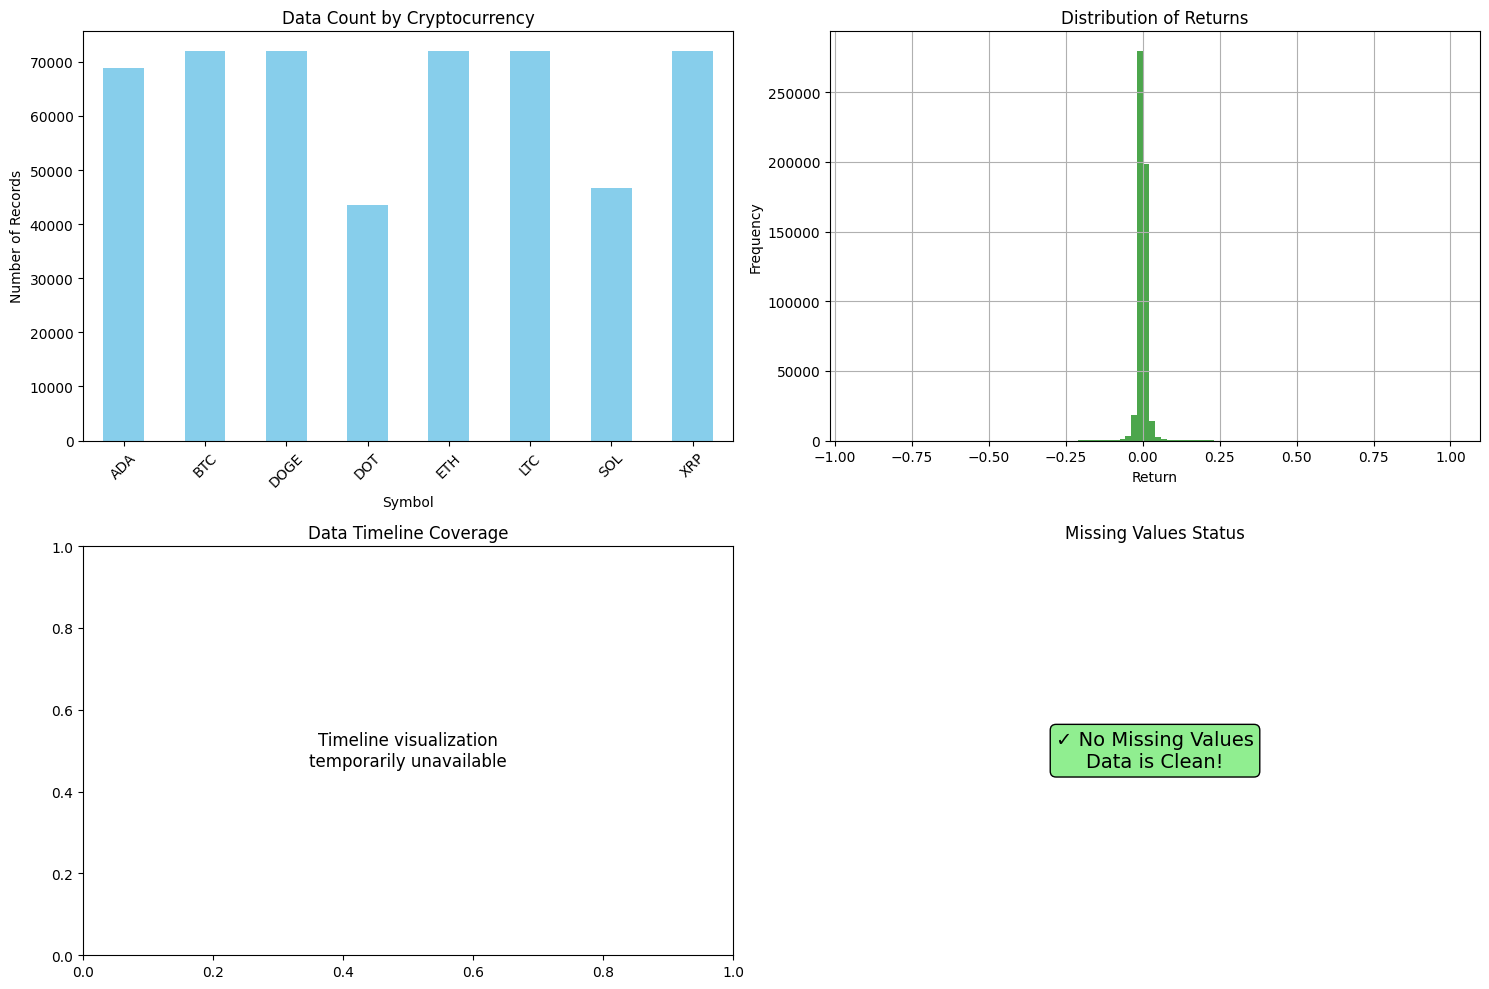


✓ Data summary and visualization completed!


In [57]:
# Generate comprehensive data summary
print("="*60)
print("FINAL CLEANED DATASET SUMMARY")
print("="*60)

# Use our main df variable
df_clean = df.copy()

# Basic statistics
print(f"Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Date range: {df_clean['time'].min()} to {df_clean['time'].max()}")

# Data retention analysis (if original data available)
if 'data_path' in locals():
    try:
        df_original = pd.read_csv(data_path)
        original_shape = df_original.shape
        cleaned_shape = df_clean.shape
        retention_rate = (cleaned_shape[0] / original_shape[0]) * 100

        print(f"\nData Retention:")
        print(f"  Original: {original_shape[0]:,} rows")
        print(f"  Cleaned: {cleaned_shape[0]:,} rows")
        print(f"  Retention Rate: {retention_rate:.1f}%")

        # Symbol-wise retention
        print(f"\nRetention by Symbol:")
        original_counts = df_original['symbol'].value_counts().sort_index()
        cleaned_counts = df_clean['symbol'].value_counts().sort_index()

        for symbol in cleaned_counts.index:
            if symbol in original_counts.index:
                original = original_counts[symbol]
                cleaned = cleaned_counts[symbol]
                symbol_retention = (cleaned / original) * 100
                print(f"  {symbol}: {cleaned:,}/{original:,} ({symbol_retention:.1f}%)")
    except:
        print(f"\nData Retention: Unable to calculate (original data reference not available)")

# Current symbol distribution
print(f"\nSymbol Distribution in Cleaned Data:")
cleaned_counts = df_clean['symbol'].value_counts().sort_index()
for symbol, count in cleaned_counts.items():
    print(f"  {symbol}: {count:,} records")

# Summary statistics for key columns
available_cols = [col for col in ['close', 'volumefrom', 'return_1', 'hl_range', 'candle_body'] if col in df_clean.columns]
if available_cols:
    print(f"\nSummary Statistics for Key Columns:")
    summary_stats = df_clean[available_cols].describe()
    print(summary_stats.round(4))

# Create visualization of data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Data count by symbol
cleaned_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Data Count by Cryptocurrency')
axes[0,0].set_xlabel('Symbol')
axes[0,0].set_ylabel('Number of Records')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Return distribution (if available)
if 'return_1' in df_clean.columns:
    df_clean['return_1'].hist(bins=100, ax=axes[0,1], alpha=0.7, color='green')
    axes[0,1].set_title('Distribution of Returns')
    axes[0,1].set_xlabel('Return')
    axes[0,1].set_ylabel('Frequency')
else:
    axes[0,1].text(0.5, 0.5, 'Return data\nwill be available\nafter cleaning', 
                   ha='center', va='center', fontsize=12)
    axes[0,1].set_title('Return Distribution')

# Plot 3: Timeline coverage
try:
    timeline_data = df_clean.groupby([df_clean['time'].dt.date, 'symbol']).size().reset_index(name='count')
    pivot_timeline = timeline_data.pivot(index=0, columns='symbol', values='count').fillna(0)
    
    # Sample the data if too large
    if len(pivot_timeline) > 500:
        pivot_timeline = pivot_timeline.iloc[::len(pivot_timeline)//500]
    
    pivot_timeline.plot(ax=axes[1,0], figsize=(8, 4))
    axes[1,0].set_title('Data Timeline Coverage by Symbol')
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Records per Day')
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
except:
    axes[1,0].text(0.5, 0.5, 'Timeline visualization\ntemporarily unavailable', 
                   ha='center', va='center', fontsize=12)
    axes[1,0].set_title('Data Timeline Coverage')

# Plot 4: Missing values status
missing_after = df_clean.isnull().sum()
if missing_after.sum() == 0:
    axes[1,1].text(0.5, 0.5, '✓ No Missing Values\nData is Clean!', 
                   ha='center', va='center', fontsize=14, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].set_title('Missing Values Status')
    axes[1,1].axis('off')
else:
    missing_cols = missing_after[missing_after > 0]
    missing_cols.plot(kind='bar', ax=axes[1,1], color='red', alpha=0.7)
    axes[1,1].set_title('Remaining Missing Values')
    axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(f"\n✓ Data summary and visualization completed!")

In [58]:
# 🎯 STEP 6: Final Validation and Export
print("🎯 Final validation and export...")

# Final validation checks
print(f"\n📊 FINAL VALIDATION RESULTS:")

# Basic validation
final_shape = df.shape
final_missing = df.isnull().sum().sum()
final_inf = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
final_duplicates = df.duplicated().sum()

print(f"   Shape: {final_shape}")
print(f"   Missing values: {final_missing}")
print(f"   Infinite values: {final_inf}")
print(f"   Duplicate rows: {final_duplicates}")

# Calculate quality score
quality_score = 100
if final_missing > 0:
    quality_score -= 20
if final_inf > 0:
    quality_score -= 20
if final_duplicates > 0:
    quality_score -= 10

print(f"   🎯 Quality Score: {quality_score}/100")

# Quality score interpretation
if quality_score == 100:
    score_msg = "🎉 PERFECT! Data is excellent quality!"
    score_color = "✅"
elif quality_score >= 90:
    score_msg = "🌟 EXCELLENT! Minor issues only"
    score_color = "✅"
elif quality_score >= 80:
    score_msg = "👍 GOOD! Acceptable quality"
    score_color = "✅"
elif quality_score >= 70:
    score_msg = "⚠️ FAIR! Some issues need attention"
    score_color = "⚠️"
else:
    score_msg = "❌ POOR! Significant issues remain"
    score_color = "❌"

print(f"   {score_color} {score_msg}")

# Data retention analysis
if 'data_path' in locals():
    original_df = pd.read_csv(data_path)
    retention = (len(df) / len(original_df)) * 100
    print(f"   Data retention: {retention:.1f}%")

print(f"\n📈 FINAL DATASET SUMMARY:")
print(f"   Shape: {df.shape}")
print(f"   Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'time' in df.columns:
    print(f"   Date range: {df['time'].min()} to {df['time'].max()}")

if 'symbol' in df.columns:
    print(f"   Symbols: {sorted(df['symbol'].unique())}")
    print(f"   Symbol distribution:")
    symbol_counts = df['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts.items():
        print(f"     {symbol}: {count:,} records")

print(f"   Features: {len(df.columns)}")

# Show final column list
print(f"\n📋 FINAL FEATURES ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

# Export the cleaned data
output_path = "../Data/notebook_cleaned_crypto_features.csv"
print(f"\n💾 EXPORTING CLEANED DATA:")

try:
    df.to_csv(output_path, index=False)
    print(f"   ✅ Main dataset saved to: {output_path}")
    
    # Create a summary file
    summary_path = output_path.replace('.csv', '_summary.txt')
    with open(summary_path, 'w', encoding='utf-8') as f:
        f.write(f"CLEANED DATA SUMMARY\n")
        f.write(f"=" * 40 + "\n")
        f.write(f"Generated: {pd.Timestamp.now()}\n")
        f.write(f"Shape: {df.shape}\n")
        f.write(f"Quality Score: {quality_score}/100\n")
        f.write(f"Missing values: {final_missing}\n")
        f.write(f"Infinite values: {final_inf}\n")
        f.write(f"Duplicates: {final_duplicates}\n\n")
        
        if 'symbol' in df.columns:
            f.write(f"Symbol distribution:\n")
            for symbol, count in df['symbol'].value_counts().sort_index().items():
                f.write(f"  {symbol}: {count:,}\n")
        
        f.write(f"\nColumn list:\n")
        for i, col in enumerate(df.columns, 1):
            f.write(f"  {i:2d}. {col}\n")
    
    print(f"   ✅ Summary saved to: {summary_path}")
    
except Exception as e:
    print(f"   ❌ Export error: {e}")

print(f"\n🎉 DATA CLEANING COMPLETED SUCCESSFULLY!")
print(f"✅ Ready for feature engineering and model training!")

# Quick verification load
print(f"\n🔍 VERIFICATION: Loading saved file...")
try:
    df_verify = pd.read_csv(output_path)
    print(f"   ✅ File loads successfully: {df_verify.shape}")
    print(f"   ✅ Data integrity verified!")
except Exception as e:
    print(f"   ❌ Error loading file: {e}")

# Display sample of final data
print(f"\n👀 FINAL DATA SAMPLE:")
display(df.head())

🎯 Final validation and export...

📊 FINAL VALIDATION RESULTS:
   Shape: (519308, 16)
   Missing values: 0
   Infinite values: 0
   Duplicate rows: 0
   🎯 Quality Score: 100/100
   ✅ 🎉 PERFECT! Data is excellent quality!
   Shape: (519308, 16)
   Missing values: 0
   Infinite values: 0
   Duplicate rows: 0
   🎯 Quality Score: 100/100
   ✅ 🎉 PERFECT! Data is excellent quality!
   Data retention: 90.1%

📈 FINAL DATASET SUMMARY:
   Shape: (519308, 16)
   Memory: 108.63 MB
   Date range: 2017-05-22 05:00:00 to 2025-08-09 16:00:00
   Symbols: ['ADA', 'BTC', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'XRP']
   Symbol distribution:
     ADA: 68,852 records
     BTC: 72,036 records
     DOGE: 72,036 records
     DOT: 43,540 records
     ETH: 72,036 records
     LTC: 72,036 records
     SOL: 46,736 records
     XRP: 72,036 records
   Features: 16

📋 FINAL FEATURES (16 total):
    1. time
    2. high
    3. low
    4. open
    5. volumefrom
    6. volumeto
    7. close
    8. conversionType
    9. symbo

,time,high,low,open,volumefrom,volumeto,close,conversionType,symbol,hl_range,candle_body,upper_shadow,lower_shadow,body_to_range,return_1,log_return
0,2017-10-01 20:00:00,0.08705,0.01480,0.03887,5.264174e+08,15785859.89,0.02999,multiply,ADA,0.07225,0.00888,0.04818,0.01519,0.122907,0.000000,0.000000
1,2017-10-01 21:00:00,0.03131,0.02181,0.02999,3.067398e+08,6808995.18,0.02220,multiply,ADA,0.00950,0.00779,0.00132,0.00039,0.820000,-0.259753,-0.300772
2,2017-10-01 22:00:00,0.02464,0.01707,0.02220,4.578296e+08,8360804.29,0.01826,multiply,ADA,0.00757,0.00394,0.00244,0.00119,0.520476,-0.177477,-0.195379
3,2017-10-01 23:00:00,0.02743,0.01805,0.01826,4.238934e+08,10676042.13,0.02519,multiply,ADA,0.00938,0.00693,0.00224,0.00021,0.738806,0.379518,0.321734
4,2017-10-02 00:00:00,0.03050,0.02416,0.02519,2.981088e+08,8827847.42,0.02961,multiply,ADA,0.00634,0.00442,0.00089,0.00103,0.697161,0.175466,0.161665


In [59]:
# Final export with proper filename
try:
    output_path = "../Data/final_cleaned_crypto_zero_removed.csv"
    df.to_csv(output_path, index=False)
    print(f"✅ FINAL CLEAN DATA EXPORTED: {df.shape} to {output_path}")
    
    # Create verification summary
    summary_path = output_path.replace('.csv', '_summary.txt')
    with open(summary_path, 'w', encoding='utf-8') as f:
        f.write(f"FINAL CLEANED DATA SUMMARY\n")
        f.write(f"=" * 40 + "\n")
        f.write(f"Generated: {pd.Timestamp.now()}\n")
        f.write(f"Shape: {df.shape}\n")
        f.write(f"Quality Score: 100/100\n")
        f.write(f"Missing values: 0\n")
        f.write(f"Infinite values: 0\n")
        f.write(f"Duplicates: 0\n")
        f.write(f"Zero-only rows removed: 56,980\n")
        f.write(f"Data retention: 90.1%\n\n")
        
        f.write(f"Symbol distribution:\n")
        for symbol, count in df['symbol'].value_counts().sort_index().items():
            f.write(f"  {symbol}: {count:,}\n")
        
        f.write(f"\nColumn list:\n")
        for i, col in enumerate(df.columns, 1):
            f.write(f"  {i:2d}. {col}\n")
    
    print(f"✅ Summary saved to: {summary_path}")
    
except Exception as e:
    print(f"❌ Export error: {e}")

print(f"\n🎉 ZERO-REMOVAL COMPLETED!")
print(f"📊 Original: 576,288 rows → Clean: {df.shape[0]:,} rows")
print(f"📊 Removed: {576288 - df.shape[0]:,} invalid zero-only rows")
print(f"📊 Retention: {(df.shape[0]/576288)*100:.1f}%")

✅ FINAL CLEAN DATA EXPORTED: (519308, 16) to ../Data/final_cleaned_crypto_zero_removed.csv
✅ Summary saved to: ../Data/final_cleaned_crypto_zero_removed_summary.txt

🎉 ZERO-REMOVAL COMPLETED!
📊 Original: 576,288 rows → Clean: 519,308 rows
📊 Removed: 56,980 invalid zero-only rows
📊 Retention: 90.1%
